In [1]:
import catboost
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
import sweetviz

from sklearn.model_selection import train_test_split
from nflows.distributions import ConditionalDiagonalNormal

from src.probabilistic_flow_boosting.tfboost.tree import EmbeddableCatBoostPriorNormal
from src.probabilistic_flow_boosting.tfboost.tfboost import TreeFlowBoost
from src.probabilistic_flow_boosting.tfboost.flow import ContinuousNormalizingFlow
from src.probabilistic_flow_boosting.pipelines.reporting.nodes import calculate_nll

from src.probabilistic_flow_boosting.pipelines.modeling.utils import setup_random_seed

RANDOM_SEED = 42

setup_random_seed(RANDOM_SEED)

/opt/conda/lib/python3.6/site-packages/sweetviz/config.py:14: DeprecationWarning: open_text is deprecated. Use files() instead. Refer to https://importlib-resources.readthedocs.io/en/latest/using.html#migrating-from-legacy for migration advice.
  the_open = pkg_resources.open_text("sweetviz", 'sweetviz_defaults.ini')


In [2]:
df = pd.read_csv('data/01_raw/CatData/avocado/avocado.csv', index_col=0)

                                             |          | [  0%]   00:00 -> (? left)


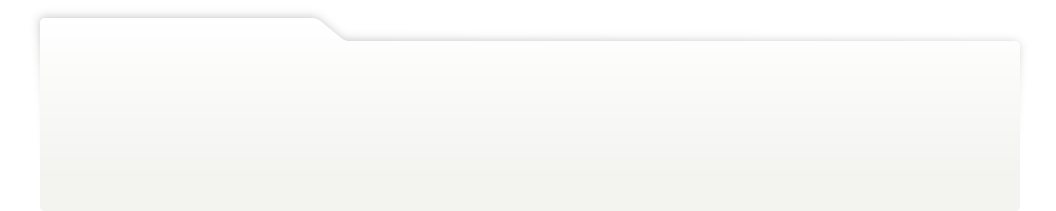
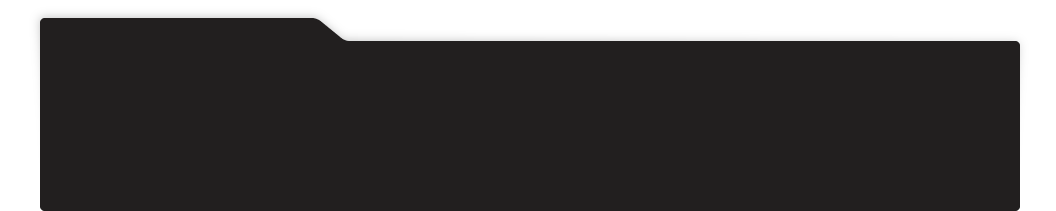
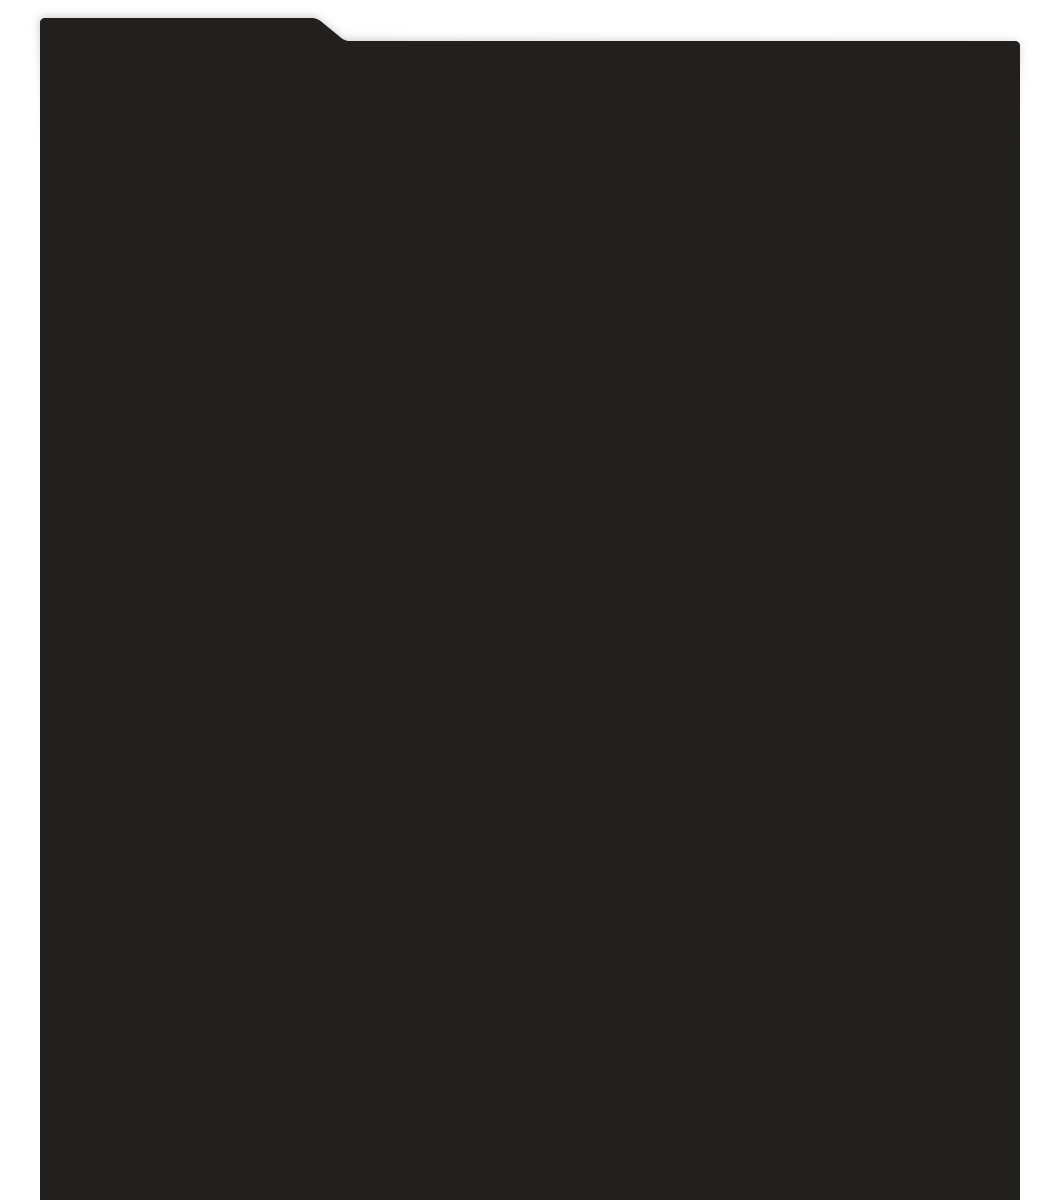
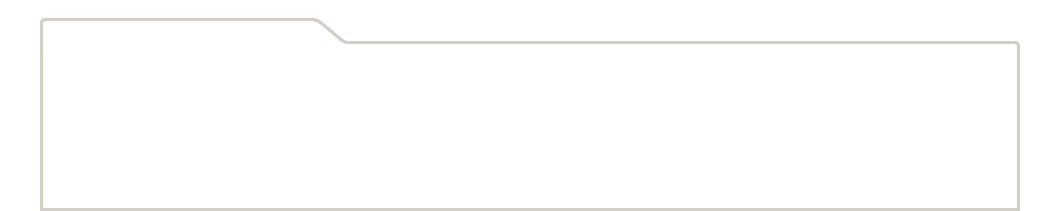
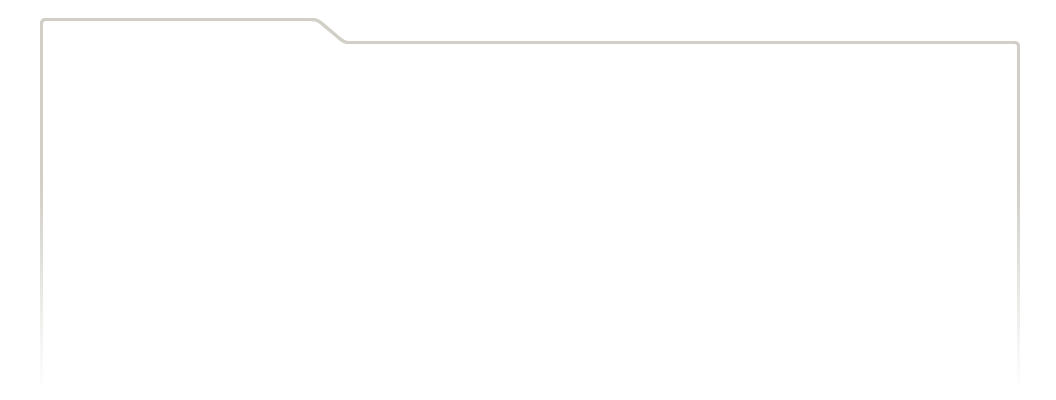
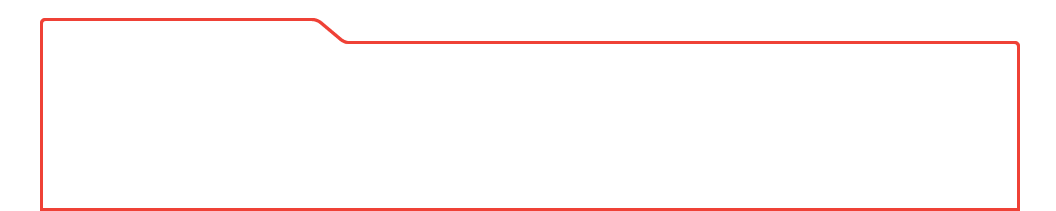
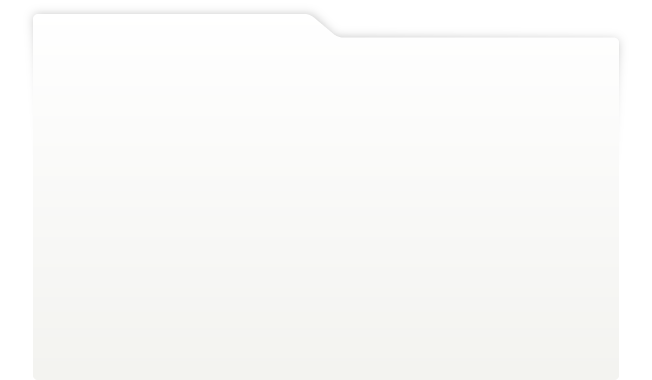
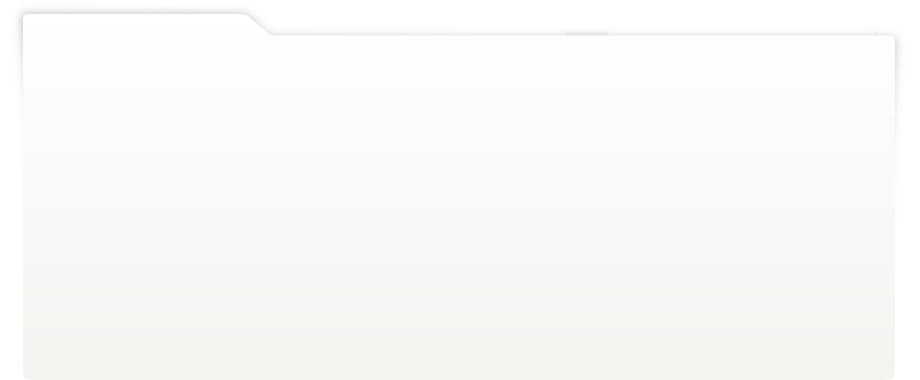
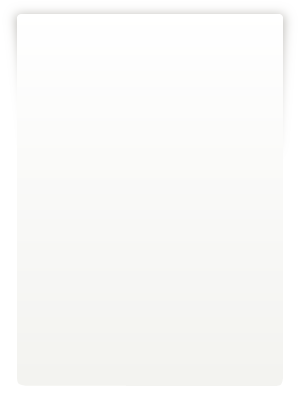
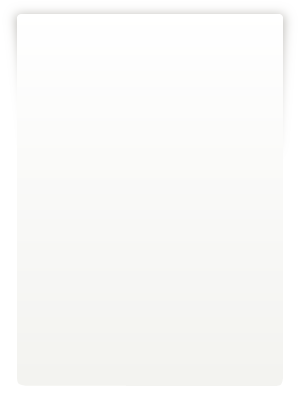
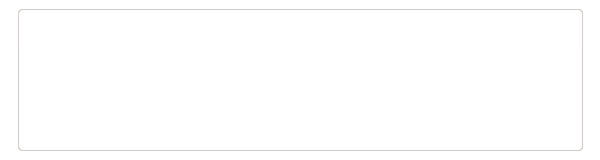
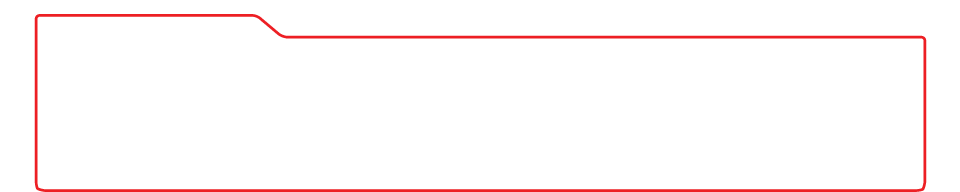
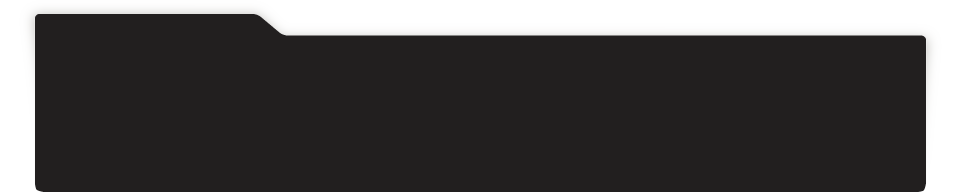
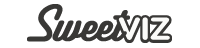
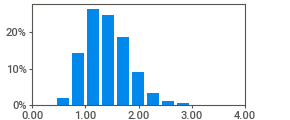
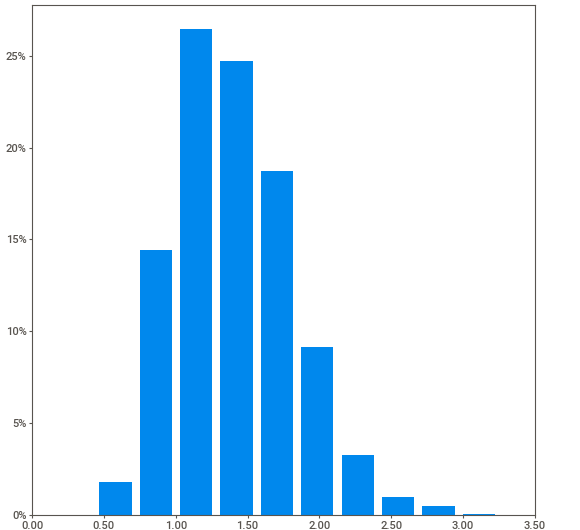
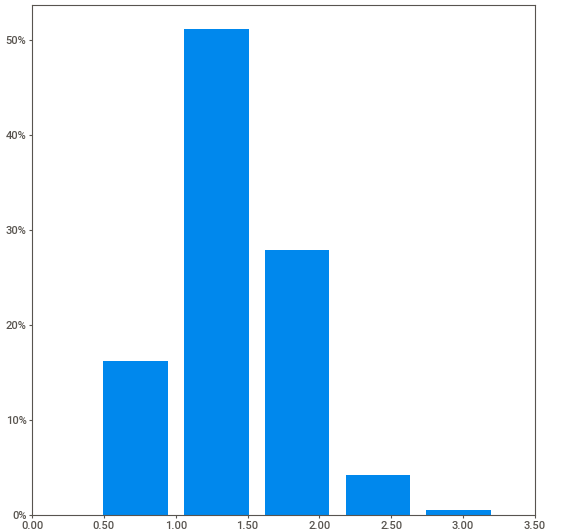
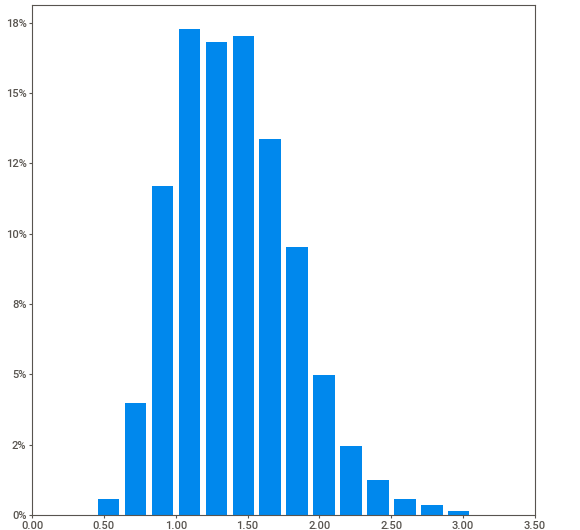
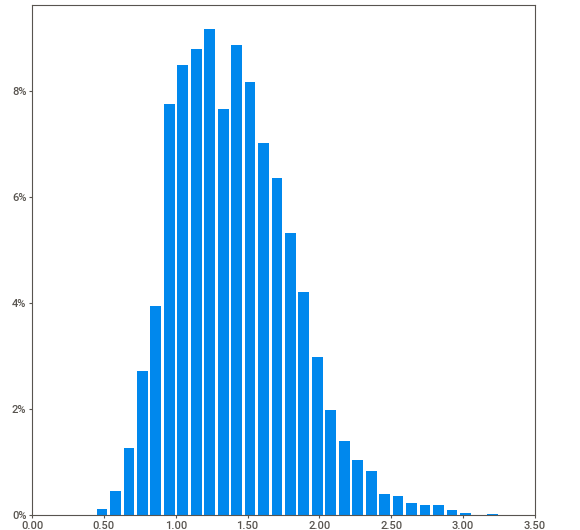
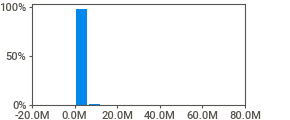
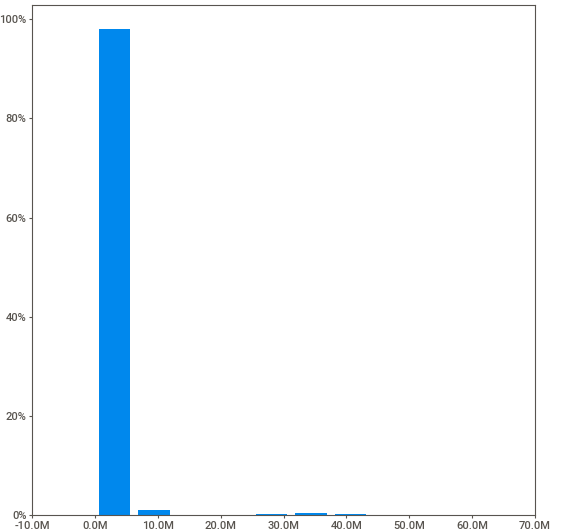
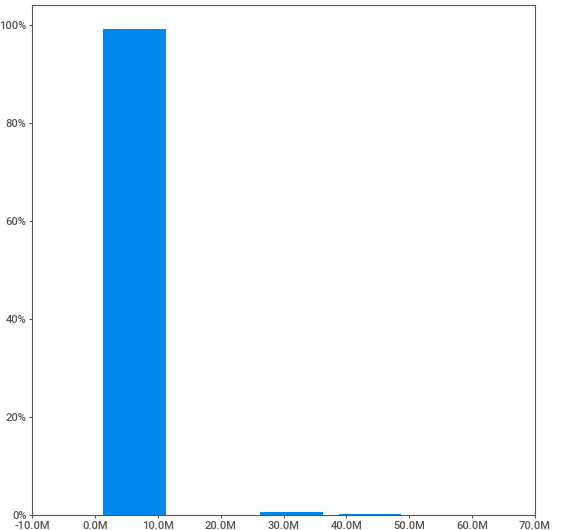
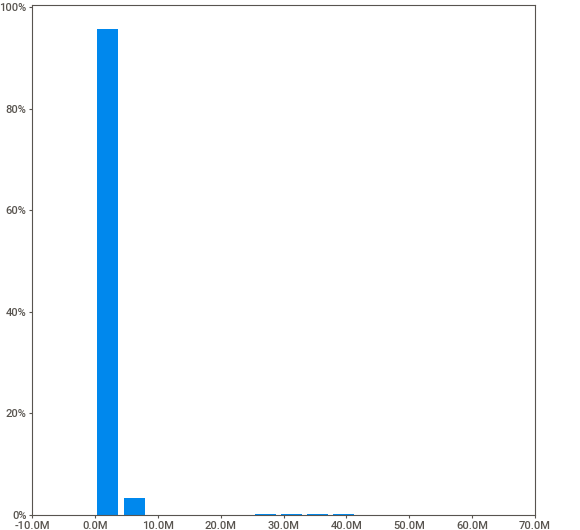
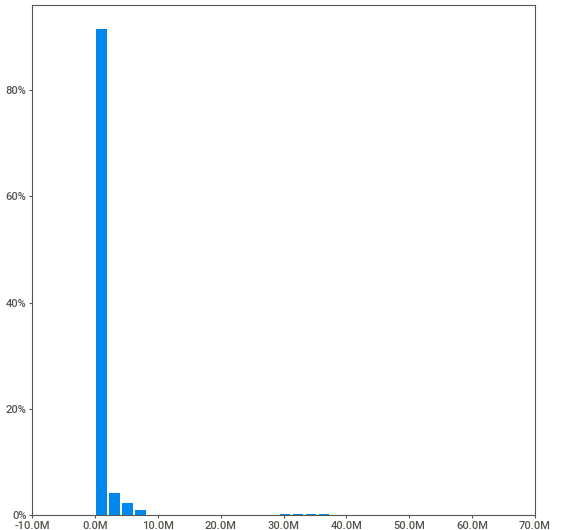
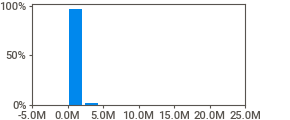
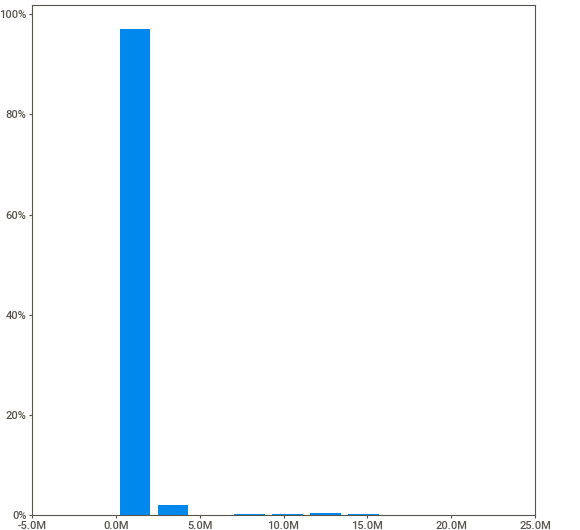
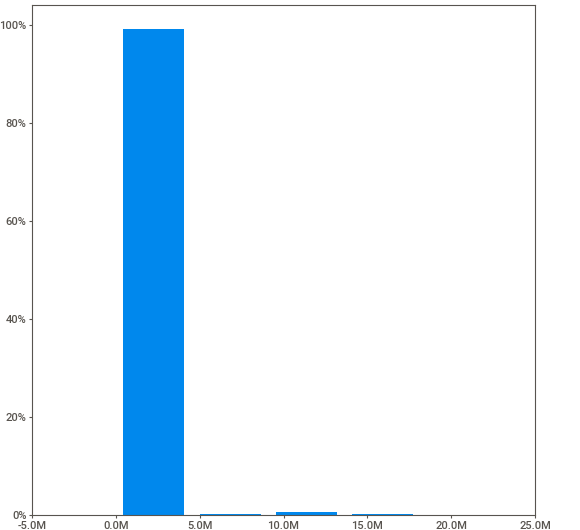
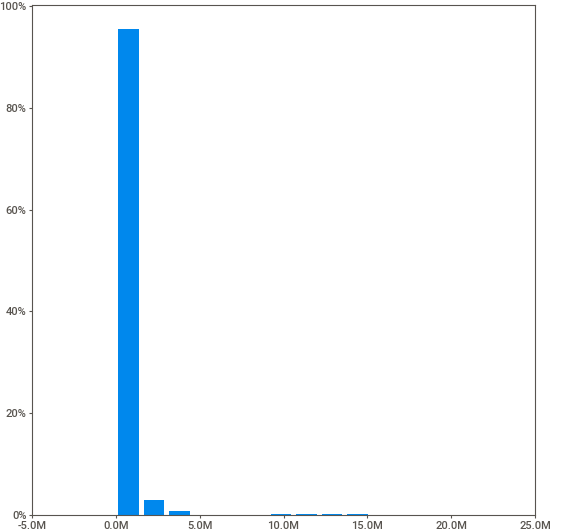
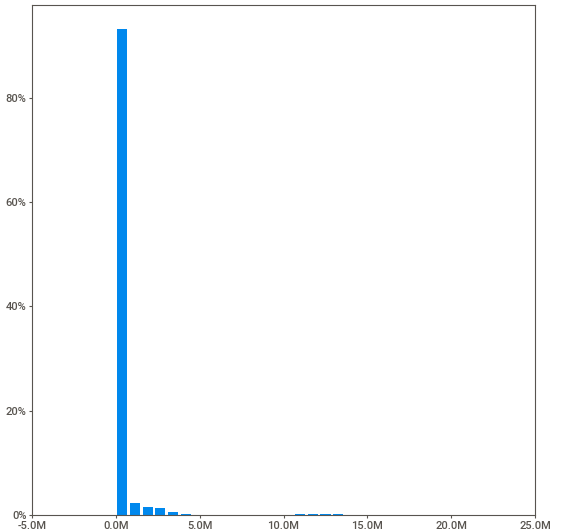
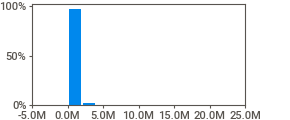
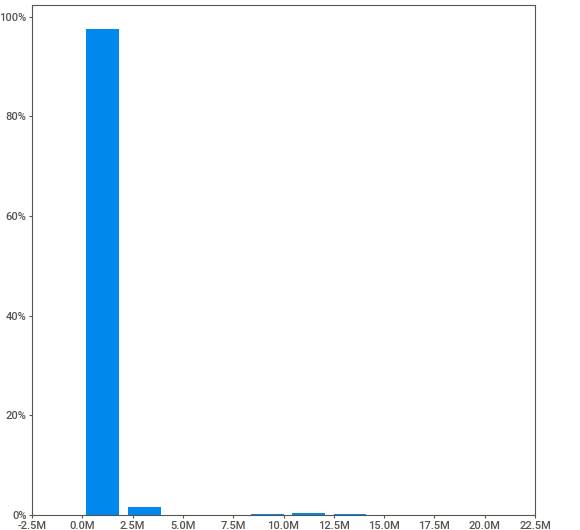
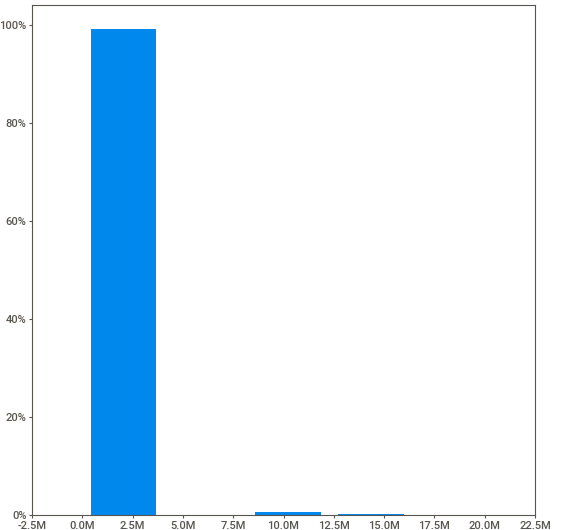
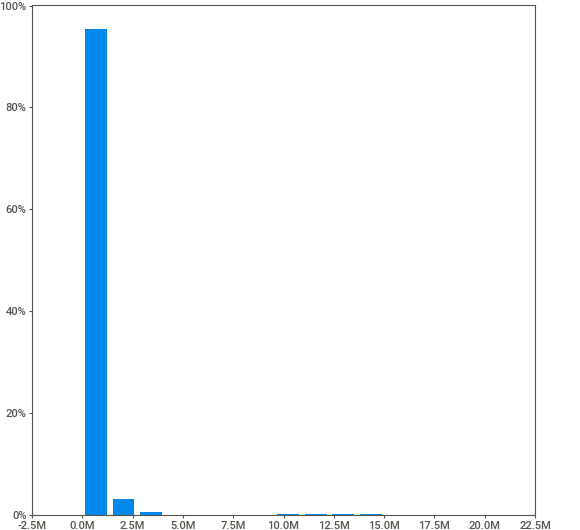
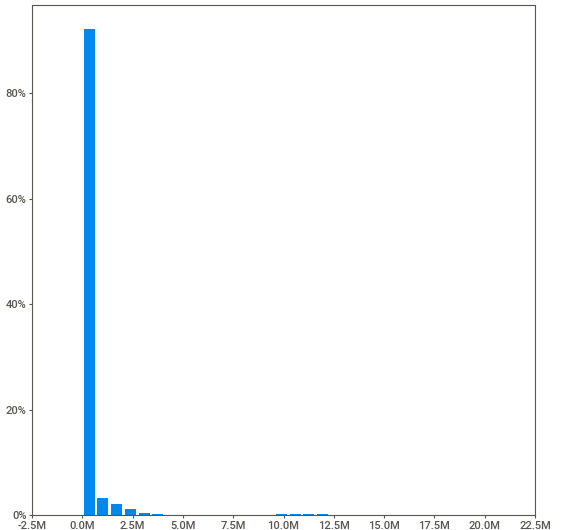
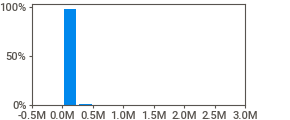
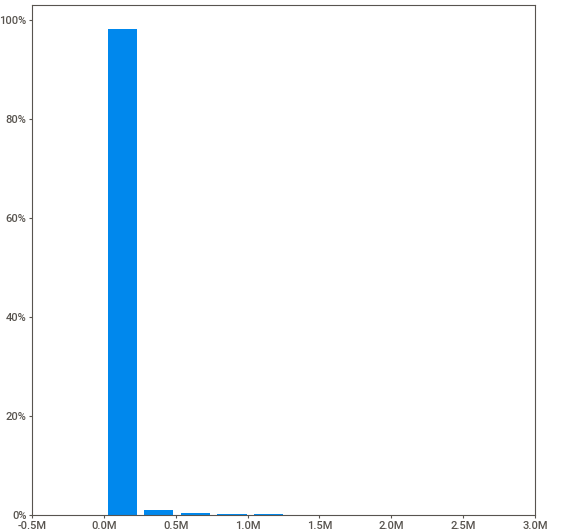
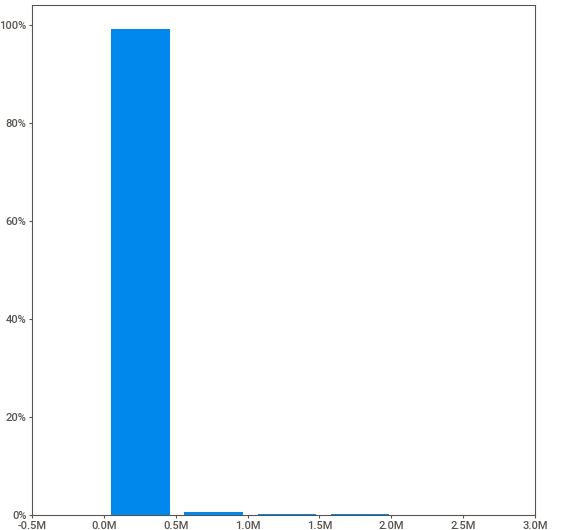
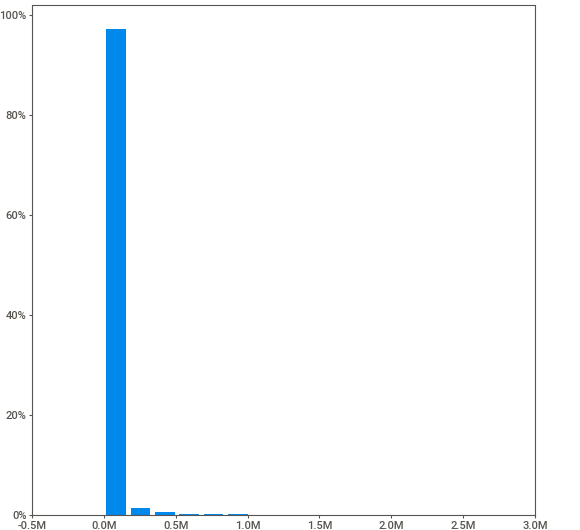
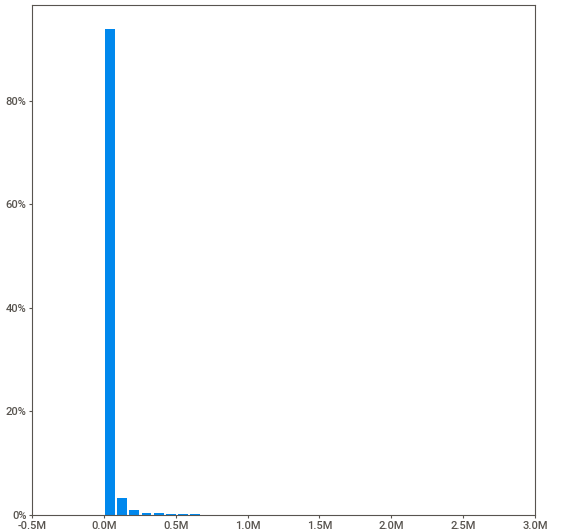
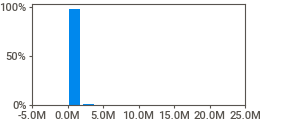
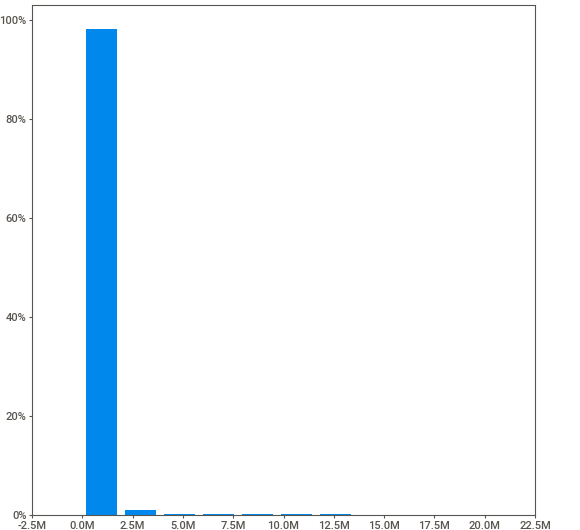
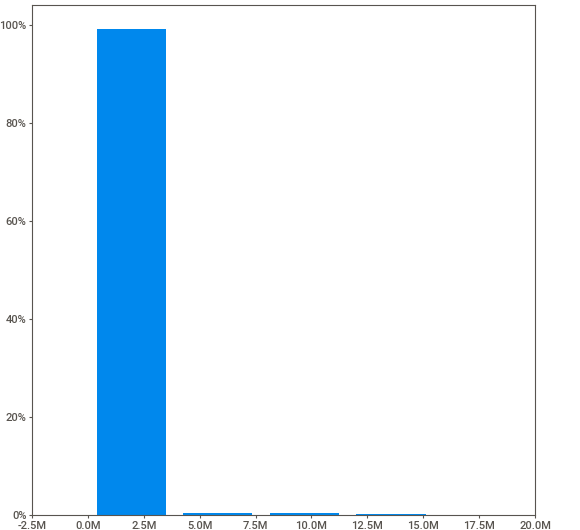
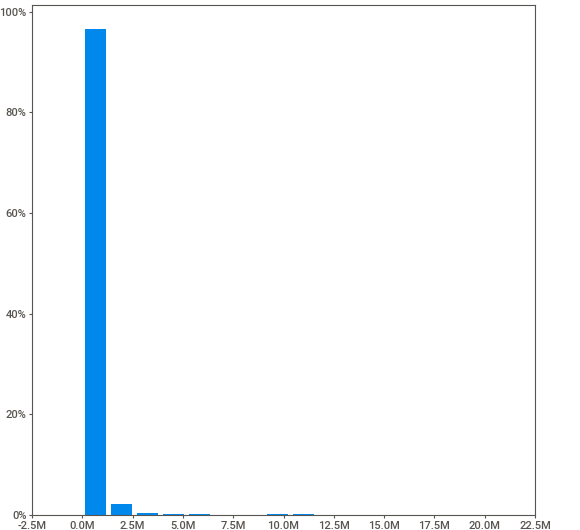
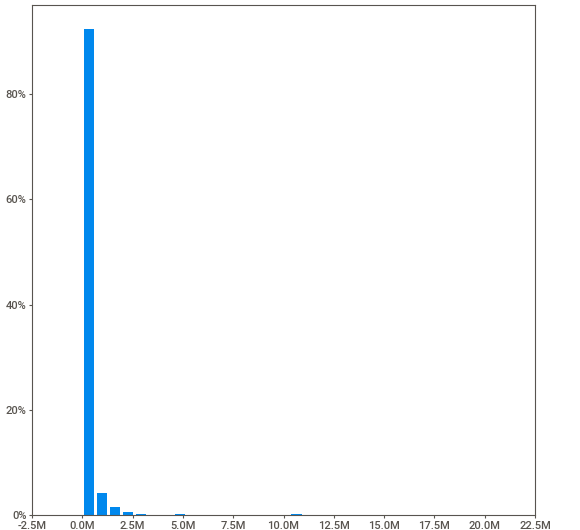
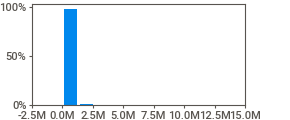
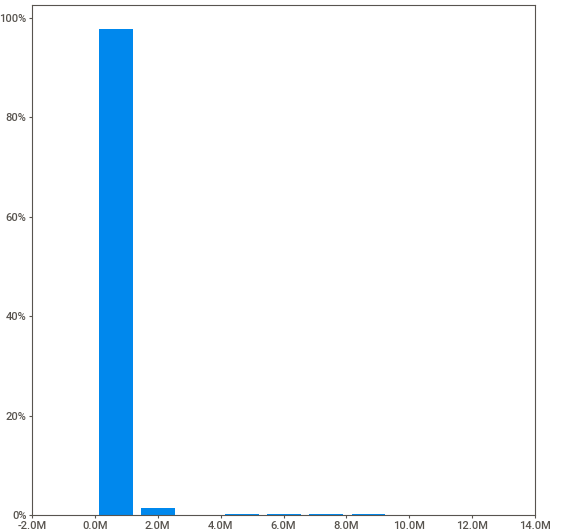
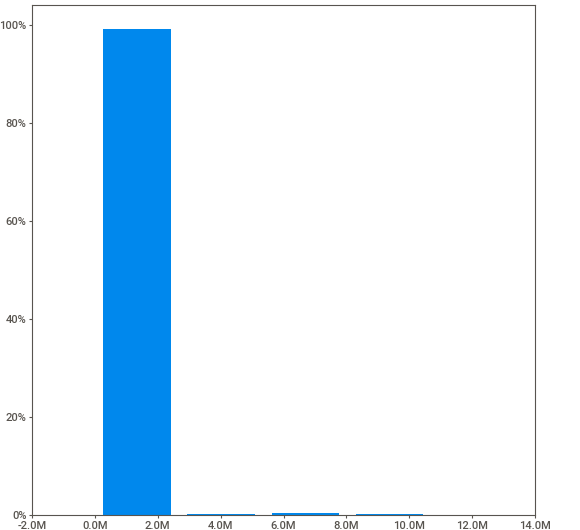
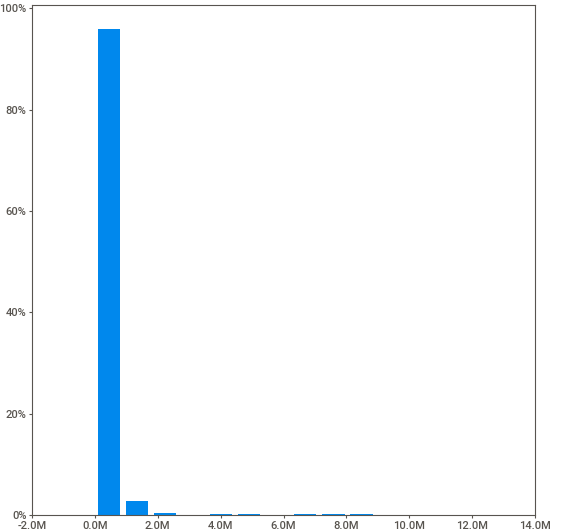
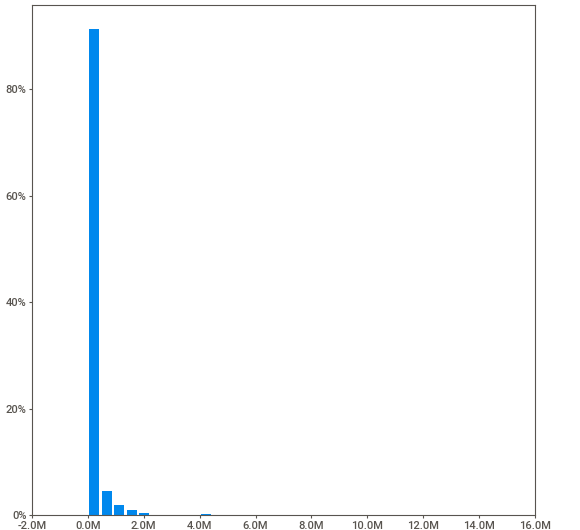
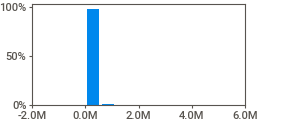
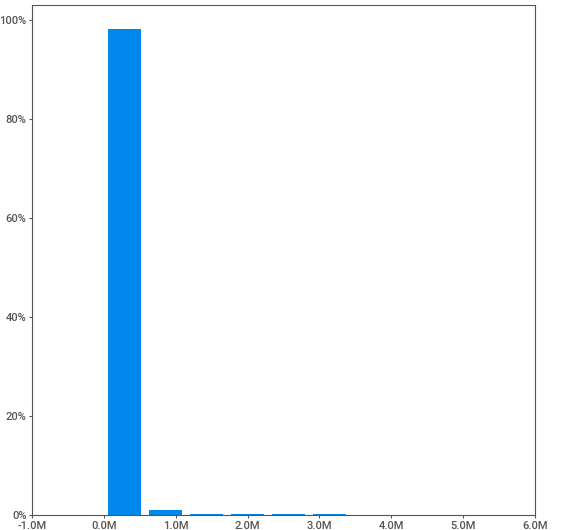
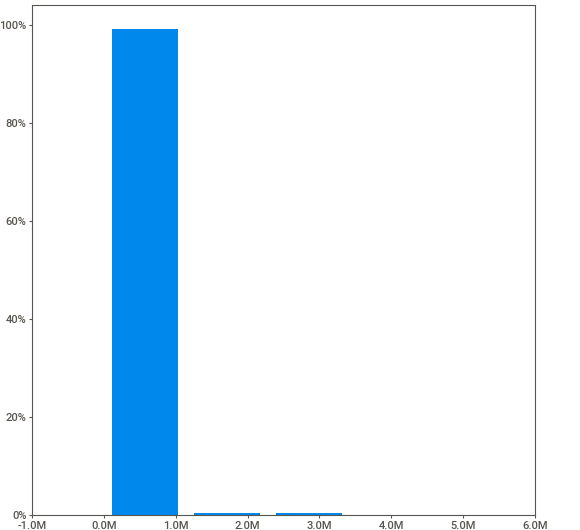
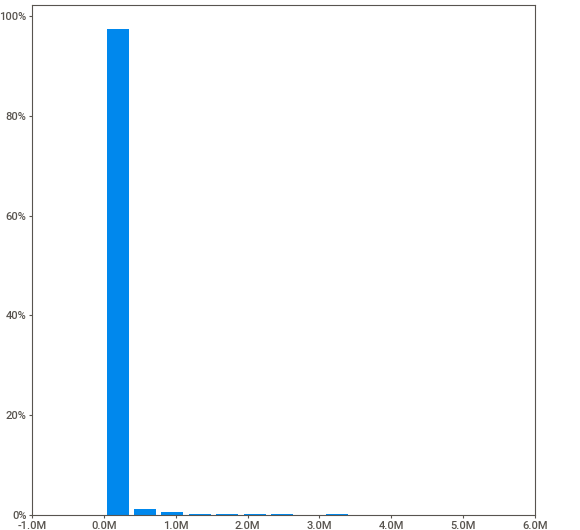
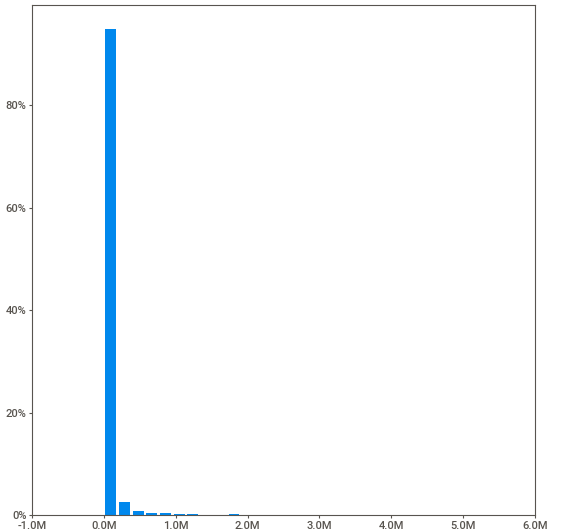
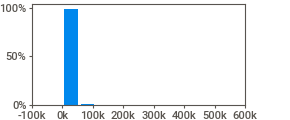
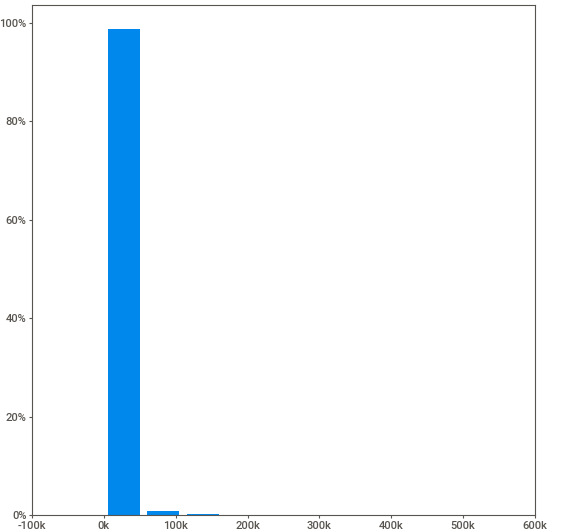
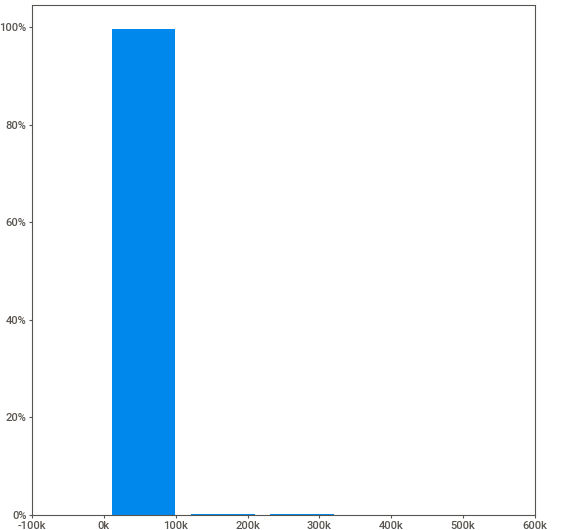
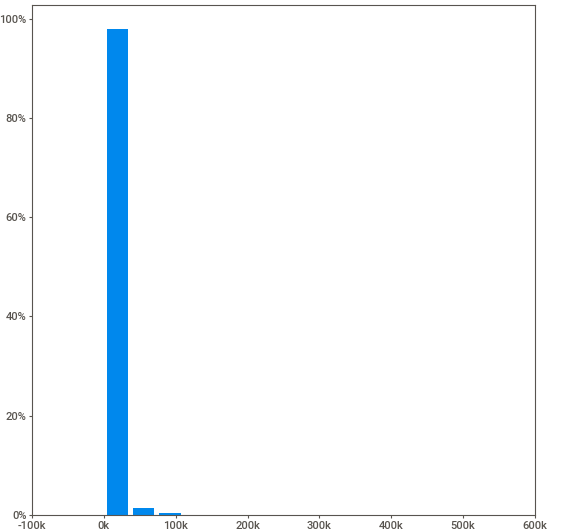
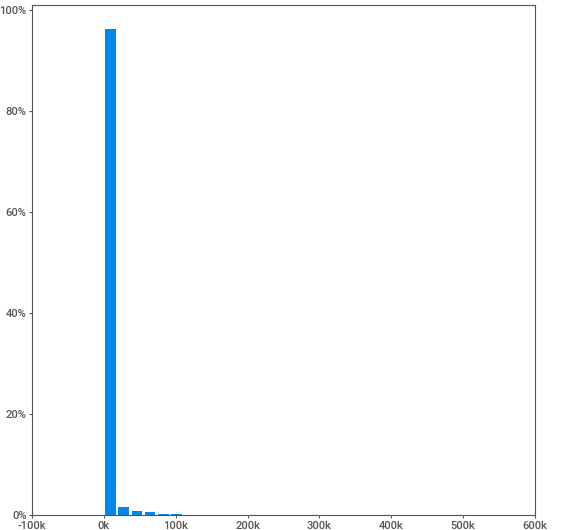
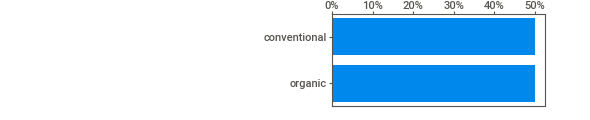
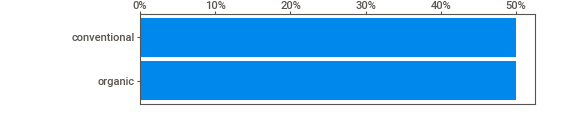
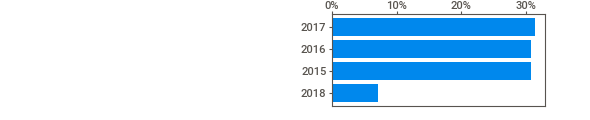
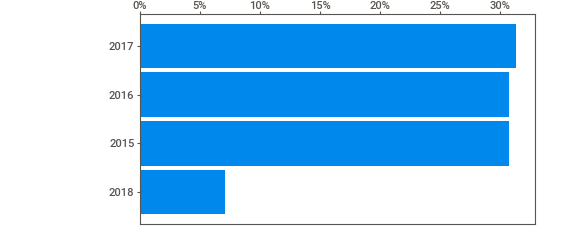
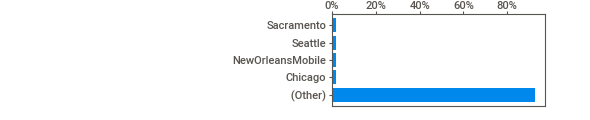
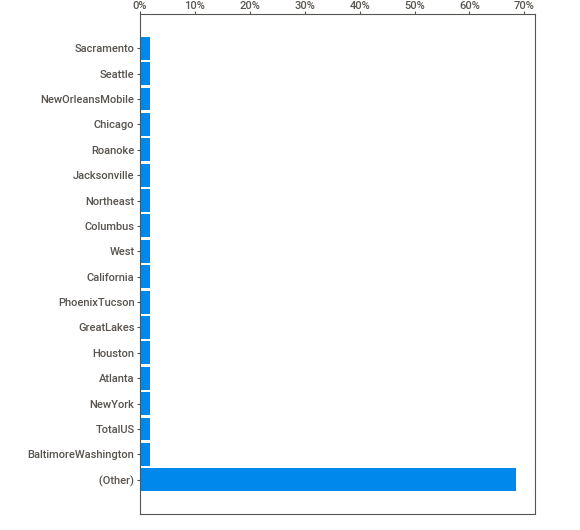
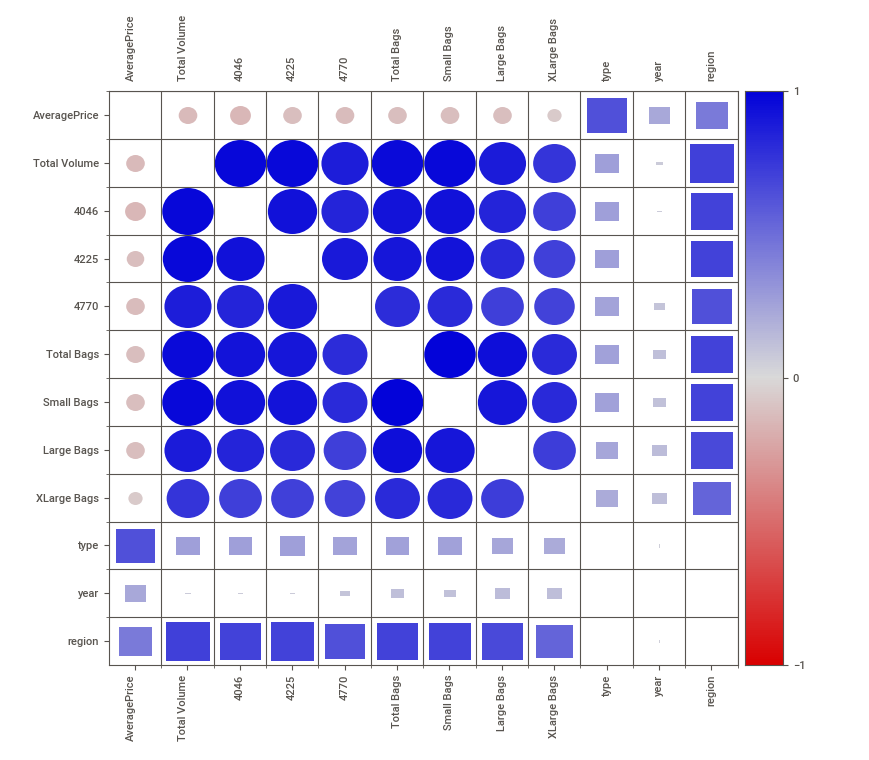
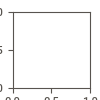

In [3]:
analysis = sweetviz.analyze(df)
analysis.show_notebook()

In [4]:
x = df.drop(columns = ['Date', 'AveragePrice'])
y = df[['AveragePrice']]

In [5]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=RANDOM_SEED)
x_tr, x_val, y_tr, y_val = train_test_split(x_train, y_train, test_size = 0.2, random_state=RANDOM_SEED)

In [6]:
x_train.shape, x_test.shape

((14599, 11), (3650, 11))

In [7]:
model = catboost.CatBoostRegressor(
    cat_features=['type', 'year', 'region'], 
    loss_function="RMSEWithUncertainty",
    num_trees=2000,
    random_state=RANDOM_SEED
)

In [8]:
model.fit(x_tr, y_tr, eval_set=(x_val, y_val))

0:	learn: 0.4881685	test: 0.4933349	best: 0.4933349 (0)	total: 53.2ms	remaining: 1m 46s
1:	learn: 0.4648523	test: 0.4700170	best: 0.4700170 (1)	total: 57.1ms	remaining: 57.1s
2:	learn: 0.4431112	test: 0.4480391	best: 0.4480391 (2)	total: 60ms	remaining: 39.9s
3:	learn: 0.4233984	test: 0.4285228	best: 0.4285228 (3)	total: 62.5ms	remaining: 31.2s
4:	learn: 0.4076340	test: 0.4124007	best: 0.4124007 (4)	total: 66ms	remaining: 26.3s
5:	learn: 0.3901445	test: 0.3951328	best: 0.3951328 (5)	total: 68.8ms	remaining: 22.9s
6:	learn: 0.3743999	test: 0.3790440	best: 0.3790440 (6)	total: 71.6ms	remaining: 20.4s
7:	learn: 0.3594742	test: 0.3642687	best: 0.3642687 (7)	total: 74.7ms	remaining: 18.6s
8:	learn: 0.3447261	test: 0.3495492	best: 0.3495492 (8)	total: 77.9ms	remaining: 17.2s
9:	learn: 0.3305762	test: 0.3351412	best: 0.3351412 (9)	total: 80.9ms	remaining: 16.1s
10:	learn: 0.3175967	test: 0.3223205	best: 0.3223205 (10)	total: 83.9ms	remaining: 15.2s
11:	learn: 0.3054872	test: 0.3099385	best: 0

119:	learn: -0.1536074	test: -0.1494006	best: -0.1494006 (119)	total: 451ms	remaining: 7.07s
120:	learn: -0.1548749	test: -0.1503739	best: -0.1503739 (120)	total: 455ms	remaining: 7.06s
121:	learn: -0.1573481	test: -0.1520603	best: -0.1520603 (121)	total: 459ms	remaining: 7.06s
122:	learn: -0.1582934	test: -0.1528863	best: -0.1528863 (122)	total: 462ms	remaining: 7.05s
123:	learn: -0.1589341	test: -0.1534488	best: -0.1534488 (123)	total: 465ms	remaining: 7.03s
124:	learn: -0.1601586	test: -0.1547049	best: -0.1547049 (124)	total: 468ms	remaining: 7.02s
125:	learn: -0.1604668	test: -0.1549689	best: -0.1549689 (125)	total: 469ms	remaining: 6.98s
126:	learn: -0.1612171	test: -0.1559719	best: -0.1559719 (126)	total: 473ms	remaining: 6.97s
127:	learn: -0.1621617	test: -0.1568755	best: -0.1568755 (127)	total: 477ms	remaining: 6.97s
128:	learn: -0.1633132	test: -0.1578067	best: -0.1578067 (128)	total: 480ms	remaining: 6.96s
129:	learn: -0.1639500	test: -0.1582913	best: -0.1582913 (129)	total: 

237:	learn: -0.2493245	test: -0.2288234	best: -0.2288234 (237)	total: 851ms	remaining: 6.3s
238:	learn: -0.2496783	test: -0.2290736	best: -0.2290736 (238)	total: 855ms	remaining: 6.3s
239:	learn: -0.2499924	test: -0.2292626	best: -0.2292626 (239)	total: 858ms	remaining: 6.29s
240:	learn: -0.2502465	test: -0.2295301	best: -0.2295301 (240)	total: 862ms	remaining: 6.29s
241:	learn: -0.2502608	test: -0.2295092	best: -0.2295301 (240)	total: 863ms	remaining: 6.27s
242:	learn: -0.2505832	test: -0.2297841	best: -0.2297841 (242)	total: 867ms	remaining: 6.27s
243:	learn: -0.2510081	test: -0.2299768	best: -0.2299768 (243)	total: 871ms	remaining: 6.27s
244:	learn: -0.2512508	test: -0.2300699	best: -0.2300699 (244)	total: 874ms	remaining: 6.26s
245:	learn: -0.2512615	test: -0.2300497	best: -0.2300699 (244)	total: 875ms	remaining: 6.24s
246:	learn: -0.2517320	test: -0.2303876	best: -0.2303876 (246)	total: 879ms	remaining: 6.24s
247:	learn: -0.2521564	test: -0.2306925	best: -0.2306925 (247)	total: 88

354:	learn: -0.3148712	test: -0.2765420	best: -0.2765420 (354)	total: 1.25s	remaining: 5.8s
355:	learn: -0.3155719	test: -0.2770569	best: -0.2770569 (355)	total: 1.25s	remaining: 5.79s
356:	learn: -0.3160229	test: -0.2774110	best: -0.2774110 (356)	total: 1.26s	remaining: 5.79s
357:	learn: -0.3167342	test: -0.2777667	best: -0.2777667 (357)	total: 1.26s	remaining: 5.79s
358:	learn: -0.3174548	test: -0.2783263	best: -0.2783263 (358)	total: 1.26s	remaining: 5.79s
359:	learn: -0.3182600	test: -0.2790384	best: -0.2790384 (359)	total: 1.27s	remaining: 5.78s
360:	learn: -0.3187890	test: -0.2793833	best: -0.2793833 (360)	total: 1.27s	remaining: 5.78s
361:	learn: -0.3194852	test: -0.2798524	best: -0.2798524 (361)	total: 1.28s	remaining: 5.78s
362:	learn: -0.3197918	test: -0.2800107	best: -0.2800107 (362)	total: 1.28s	remaining: 5.77s
363:	learn: -0.3203878	test: -0.2803516	best: -0.2803516 (363)	total: 1.28s	remaining: 5.77s
364:	learn: -0.3212117	test: -0.2808262	best: -0.2808262 (364)	total: 1

467:	learn: -0.3749296	test: -0.3155867	best: -0.3155867 (467)	total: 1.65s	remaining: 5.4s
468:	learn: -0.3757405	test: -0.3160952	best: -0.3160952 (468)	total: 1.65s	remaining: 5.4s
469:	learn: -0.3760424	test: -0.3163360	best: -0.3163360 (469)	total: 1.66s	remaining: 5.39s
470:	learn: -0.3762780	test: -0.3165019	best: -0.3165019 (470)	total: 1.66s	remaining: 5.39s
471:	learn: -0.3766757	test: -0.3167025	best: -0.3167025 (471)	total: 1.66s	remaining: 5.38s
472:	learn: -0.3770239	test: -0.3169268	best: -0.3169268 (472)	total: 1.67s	remaining: 5.38s
473:	learn: -0.3776290	test: -0.3172980	best: -0.3172980 (473)	total: 1.67s	remaining: 5.38s
474:	learn: -0.3782404	test: -0.3175330	best: -0.3175330 (474)	total: 1.67s	remaining: 5.38s
475:	learn: -0.3784769	test: -0.3176119	best: -0.3176119 (475)	total: 1.68s	remaining: 5.37s
476:	learn: -0.3789111	test: -0.3178184	best: -0.3178184 (476)	total: 1.68s	remaining: 5.37s
477:	learn: -0.3792412	test: -0.3180101	best: -0.3180101 (477)	total: 1.

583:	learn: -0.4204716	test: -0.3381874	best: -0.3381874 (583)	total: 2.05s	remaining: 4.96s
584:	learn: -0.4207547	test: -0.3383288	best: -0.3383288 (584)	total: 2.05s	remaining: 4.96s
585:	learn: -0.4210241	test: -0.3384303	best: -0.3384303 (585)	total: 2.05s	remaining: 4.96s
586:	learn: -0.4212622	test: -0.3384835	best: -0.3384835 (586)	total: 2.06s	remaining: 4.95s
587:	learn: -0.4217784	test: -0.3388489	best: -0.3388489 (587)	total: 2.06s	remaining: 4.95s
588:	learn: -0.4219472	test: -0.3388908	best: -0.3388908 (588)	total: 2.06s	remaining: 4.94s
589:	learn: -0.4223551	test: -0.3390523	best: -0.3390523 (589)	total: 2.07s	remaining: 4.94s
590:	learn: -0.4225414	test: -0.3390871	best: -0.3390871 (590)	total: 2.07s	remaining: 4.93s
591:	learn: -0.4227749	test: -0.3391671	best: -0.3391671 (591)	total: 2.07s	remaining: 4.93s
592:	learn: -0.4230258	test: -0.3393945	best: -0.3393945 (592)	total: 2.08s	remaining: 4.93s
593:	learn: -0.4235005	test: -0.3397013	best: -0.3397013 (593)	total: 

700:	learn: -0.4561576	test: -0.3541744	best: -0.3541744 (700)	total: 2.45s	remaining: 4.53s
701:	learn: -0.4565128	test: -0.3544729	best: -0.3544729 (701)	total: 2.45s	remaining: 4.53s
702:	learn: -0.4568192	test: -0.3548871	best: -0.3548871 (702)	total: 2.45s	remaining: 4.53s
703:	learn: -0.4570916	test: -0.3549181	best: -0.3549181 (703)	total: 2.46s	remaining: 4.52s
704:	learn: -0.4573690	test: -0.3549432	best: -0.3549432 (704)	total: 2.46s	remaining: 4.52s
705:	learn: -0.4576111	test: -0.3548311	best: -0.3549432 (704)	total: 2.46s	remaining: 4.52s
706:	learn: -0.4578587	test: -0.3549197	best: -0.3549432 (704)	total: 2.47s	remaining: 4.51s
707:	learn: -0.4581974	test: -0.3551586	best: -0.3551586 (707)	total: 2.47s	remaining: 4.51s
708:	learn: -0.4585195	test: -0.3551524	best: -0.3551586 (707)	total: 2.47s	remaining: 4.5s
709:	learn: -0.4588190	test: -0.3552409	best: -0.3552409 (709)	total: 2.48s	remaining: 4.5s
710:	learn: -0.4592262	test: -0.3554411	best: -0.3554411 (710)	total: 2.

817:	learn: -0.4890477	test: -0.3696405	best: -0.3696405 (817)	total: 2.85s	remaining: 4.11s
818:	learn: -0.4892535	test: -0.3699956	best: -0.3699956 (818)	total: 2.85s	remaining: 4.11s
819:	learn: -0.4894548	test: -0.3702304	best: -0.3702304 (819)	total: 2.85s	remaining: 4.11s
820:	learn: -0.4895712	test: -0.3702537	best: -0.3702537 (820)	total: 2.85s	remaining: 4.1s
821:	learn: -0.4901810	test: -0.3708363	best: -0.3708363 (821)	total: 2.86s	remaining: 4.1s
822:	learn: -0.4903930	test: -0.3708835	best: -0.3708835 (822)	total: 2.86s	remaining: 4.09s
823:	learn: -0.4906579	test: -0.3708656	best: -0.3708835 (822)	total: 2.87s	remaining: 4.09s
824:	learn: -0.4908728	test: -0.3708750	best: -0.3708835 (822)	total: 2.87s	remaining: 4.09s
825:	learn: -0.4909559	test: -0.3708531	best: -0.3708835 (822)	total: 2.87s	remaining: 4.08s
826:	learn: -0.4912253	test: -0.3709491	best: -0.3709491 (826)	total: 2.88s	remaining: 4.08s
827:	learn: -0.4914155	test: -0.3709473	best: -0.3709491 (826)	total: 2.

932:	learn: -0.5173221	test: -0.3827628	best: -0.3827628 (932)	total: 3.24s	remaining: 3.71s
933:	learn: -0.5174830	test: -0.3826796	best: -0.3827628 (932)	total: 3.25s	remaining: 3.71s
934:	learn: -0.5177407	test: -0.3827139	best: -0.3827628 (932)	total: 3.25s	remaining: 3.7s
935:	learn: -0.5180006	test: -0.3826978	best: -0.3827628 (932)	total: 3.25s	remaining: 3.7s
936:	learn: -0.5181223	test: -0.3827249	best: -0.3827628 (932)	total: 3.26s	remaining: 3.69s
937:	learn: -0.5185033	test: -0.3827805	best: -0.3827805 (937)	total: 3.26s	remaining: 3.69s
938:	learn: -0.5188187	test: -0.3829986	best: -0.3829986 (938)	total: 3.26s	remaining: 3.69s
939:	learn: -0.5189869	test: -0.3830480	best: -0.3830480 (939)	total: 3.27s	remaining: 3.69s
940:	learn: -0.5193187	test: -0.3832182	best: -0.3832182 (940)	total: 3.27s	remaining: 3.68s
941:	learn: -0.5194720	test: -0.3831995	best: -0.3832182 (940)	total: 3.27s	remaining: 3.68s
942:	learn: -0.5197538	test: -0.3833153	best: -0.3833153 (942)	total: 3.

1049:	learn: -0.5406449	test: -0.3904681	best: -0.3904681 (1049)	total: 3.64s	remaining: 3.3s
1050:	learn: -0.5408706	test: -0.3904981	best: -0.3904981 (1050)	total: 3.65s	remaining: 3.29s
1051:	learn: -0.5410316	test: -0.3905590	best: -0.3905590 (1051)	total: 3.65s	remaining: 3.29s
1052:	learn: -0.5411797	test: -0.3905097	best: -0.3905590 (1051)	total: 3.65s	remaining: 3.29s
1053:	learn: -0.5412857	test: -0.3903800	best: -0.3905590 (1051)	total: 3.66s	remaining: 3.28s
1054:	learn: -0.5415390	test: -0.3904397	best: -0.3905590 (1051)	total: 3.66s	remaining: 3.28s
1055:	learn: -0.5416470	test: -0.3903198	best: -0.3905590 (1051)	total: 3.66s	remaining: 3.27s
1056:	learn: -0.5417058	test: -0.3901671	best: -0.3905590 (1051)	total: 3.67s	remaining: 3.27s
1057:	learn: -0.5418002	test: -0.3900210	best: -0.3905590 (1051)	total: 3.67s	remaining: 3.27s
1058:	learn: -0.5420771	test: -0.3899535	best: -0.3905590 (1051)	total: 3.67s	remaining: 3.26s
1059:	learn: -0.5423440	test: -0.3902167	best: -0.3

1165:	learn: -0.5629062	test: -0.3943315	best: -0.3945495 (1160)	total: 4.04s	remaining: 2.89s
1166:	learn: -0.5629982	test: -0.3944036	best: -0.3945495 (1160)	total: 4.04s	remaining: 2.89s
1167:	learn: -0.5631517	test: -0.3944111	best: -0.3945495 (1160)	total: 4.05s	remaining: 2.88s
1168:	learn: -0.5633123	test: -0.3943256	best: -0.3945495 (1160)	total: 4.05s	remaining: 2.88s
1169:	learn: -0.5634293	test: -0.3941277	best: -0.3945495 (1160)	total: 4.05s	remaining: 2.88s
1170:	learn: -0.5637272	test: -0.3942753	best: -0.3945495 (1160)	total: 4.06s	remaining: 2.87s
1171:	learn: -0.5639416	test: -0.3941567	best: -0.3945495 (1160)	total: 4.06s	remaining: 2.87s
1172:	learn: -0.5640194	test: -0.3941072	best: -0.3945495 (1160)	total: 4.06s	remaining: 2.87s
1173:	learn: -0.5643439	test: -0.3940795	best: -0.3945495 (1160)	total: 4.07s	remaining: 2.86s
1174:	learn: -0.5646822	test: -0.3944792	best: -0.3945495 (1160)	total: 4.07s	remaining: 2.86s
1175:	learn: -0.5649815	test: -0.3945928	best: -0.

1285:	learn: -0.5813541	test: -0.3934734	best: -0.3945928 (1175)	total: 4.44s	remaining: 2.46s
1286:	learn: -0.5815439	test: -0.3935750	best: -0.3945928 (1175)	total: 4.44s	remaining: 2.46s
1287:	learn: -0.5815979	test: -0.3935563	best: -0.3945928 (1175)	total: 4.45s	remaining: 2.46s
1288:	learn: -0.5816502	test: -0.3935400	best: -0.3945928 (1175)	total: 4.45s	remaining: 2.45s
1289:	learn: -0.5817436	test: -0.3936090	best: -0.3945928 (1175)	total: 4.45s	remaining: 2.45s
1290:	learn: -0.5818049	test: -0.3935272	best: -0.3945928 (1175)	total: 4.45s	remaining: 2.45s
1291:	learn: -0.5818826	test: -0.3935140	best: -0.3945928 (1175)	total: 4.46s	remaining: 2.44s
1292:	learn: -0.5820009	test: -0.3934750	best: -0.3945928 (1175)	total: 4.46s	remaining: 2.44s
1293:	learn: -0.5821060	test: -0.3933528	best: -0.3945928 (1175)	total: 4.46s	remaining: 2.44s
1294:	learn: -0.5822364	test: -0.3933544	best: -0.3945928 (1175)	total: 4.47s	remaining: 2.43s
1295:	learn: -0.5824791	test: -0.3932856	best: -0.

1403:	learn: -0.5961964	test: -0.3938572	best: -0.3945928 (1175)	total: 4.84s	remaining: 2.05s
1404:	learn: -0.5962953	test: -0.3939119	best: -0.3945928 (1175)	total: 4.84s	remaining: 2.05s
1405:	learn: -0.5963734	test: -0.3939000	best: -0.3945928 (1175)	total: 4.84s	remaining: 2.05s
1406:	learn: -0.5965455	test: -0.3940962	best: -0.3945928 (1175)	total: 4.85s	remaining: 2.04s
1407:	learn: -0.5966151	test: -0.3941443	best: -0.3945928 (1175)	total: 4.85s	remaining: 2.04s
1408:	learn: -0.5968546	test: -0.3941152	best: -0.3945928 (1175)	total: 4.85s	remaining: 2.04s
1409:	learn: -0.5970185	test: -0.3941927	best: -0.3945928 (1175)	total: 4.86s	remaining: 2.03s
1410:	learn: -0.5970596	test: -0.3941842	best: -0.3945928 (1175)	total: 4.86s	remaining: 2.03s
1411:	learn: -0.5972795	test: -0.3941760	best: -0.3945928 (1175)	total: 4.86s	remaining: 2.02s
1412:	learn: -0.5973152	test: -0.3941432	best: -0.3945928 (1175)	total: 4.87s	remaining: 2.02s
1413:	learn: -0.5975454	test: -0.3942011	best: -0.

1525:	learn: -0.6122744	test: -0.3944715	best: -0.3946162 (1524)	total: 5.24s	remaining: 1.63s
1526:	learn: -0.6124808	test: -0.3945477	best: -0.3946162 (1524)	total: 5.24s	remaining: 1.62s
1527:	learn: -0.6127090	test: -0.3946973	best: -0.3946973 (1527)	total: 5.24s	remaining: 1.62s
1528:	learn: -0.6130509	test: -0.3949000	best: -0.3949000 (1528)	total: 5.25s	remaining: 1.62s
1529:	learn: -0.6132040	test: -0.3947144	best: -0.3949000 (1528)	total: 5.25s	remaining: 1.61s
1530:	learn: -0.6132464	test: -0.3946862	best: -0.3949000 (1528)	total: 5.25s	remaining: 1.61s
1531:	learn: -0.6133178	test: -0.3946342	best: -0.3949000 (1528)	total: 5.26s	remaining: 1.6s
1532:	learn: -0.6133529	test: -0.3946002	best: -0.3949000 (1528)	total: 5.26s	remaining: 1.6s
1533:	learn: -0.6134383	test: -0.3946359	best: -0.3949000 (1528)	total: 5.26s	remaining: 1.6s
1534:	learn: -0.6134484	test: -0.3945772	best: -0.3949000 (1528)	total: 5.27s	remaining: 1.59s
1535:	learn: -0.6135466	test: -0.3945211	best: -0.394

1644:	learn: -0.6266138	test: -0.3950320	best: -0.3956515 (1589)	total: 5.63s	remaining: 1.22s
1645:	learn: -0.6267104	test: -0.3949687	best: -0.3956515 (1589)	total: 5.64s	remaining: 1.21s
1646:	learn: -0.6267406	test: -0.3949988	best: -0.3956515 (1589)	total: 5.64s	remaining: 1.21s
1647:	learn: -0.6268887	test: -0.3949135	best: -0.3956515 (1589)	total: 5.64s	remaining: 1.21s
1648:	learn: -0.6271178	test: -0.3951593	best: -0.3956515 (1589)	total: 5.65s	remaining: 1.2s
1649:	learn: -0.6272623	test: -0.3952270	best: -0.3956515 (1589)	total: 5.65s	remaining: 1.2s
1650:	learn: -0.6273188	test: -0.3952388	best: -0.3956515 (1589)	total: 5.65s	remaining: 1.2s
1651:	learn: -0.6273848	test: -0.3951372	best: -0.3956515 (1589)	total: 5.66s	remaining: 1.19s
1652:	learn: -0.6275086	test: -0.3951616	best: -0.3956515 (1589)	total: 5.66s	remaining: 1.19s
1653:	learn: -0.6277264	test: -0.3952799	best: -0.3956515 (1589)	total: 5.67s	remaining: 1.19s
1654:	learn: -0.6278489	test: -0.3952775	best: -0.395

1766:	learn: -0.6426909	test: -0.3982116	best: -0.3982205 (1765)	total: 6.03s	remaining: 795ms
1767:	learn: -0.6428216	test: -0.3979653	best: -0.3982205 (1765)	total: 6.03s	remaining: 792ms
1768:	learn: -0.6428368	test: -0.3979174	best: -0.3982205 (1765)	total: 6.04s	remaining: 788ms
1769:	learn: -0.6430395	test: -0.3978276	best: -0.3982205 (1765)	total: 6.04s	remaining: 785ms
1770:	learn: -0.6432256	test: -0.3977907	best: -0.3982205 (1765)	total: 6.04s	remaining: 782ms
1771:	learn: -0.6435117	test: -0.3979775	best: -0.3982205 (1765)	total: 6.05s	remaining: 778ms
1772:	learn: -0.6436635	test: -0.3981589	best: -0.3982205 (1765)	total: 6.05s	remaining: 775ms
1773:	learn: -0.6437829	test: -0.3982043	best: -0.3982205 (1765)	total: 6.05s	remaining: 771ms
1774:	learn: -0.6439144	test: -0.3982721	best: -0.3982721 (1774)	total: 6.06s	remaining: 768ms
1775:	learn: -0.6440910	test: -0.3983514	best: -0.3983514 (1775)	total: 6.06s	remaining: 764ms
1776:	learn: -0.6442260	test: -0.3983609	best: -0.

1887:	learn: -0.6570187	test: -0.4001395	best: -0.4002757 (1885)	total: 6.43s	remaining: 381ms
1888:	learn: -0.6571345	test: -0.4000386	best: -0.4002757 (1885)	total: 6.43s	remaining: 378ms
1889:	learn: -0.6572398	test: -0.4000154	best: -0.4002757 (1885)	total: 6.44s	remaining: 375ms
1890:	learn: -0.6573288	test: -0.3999610	best: -0.4002757 (1885)	total: 6.44s	remaining: 371ms
1891:	learn: -0.6574688	test: -0.4000384	best: -0.4002757 (1885)	total: 6.44s	remaining: 368ms
1892:	learn: -0.6575581	test: -0.4000556	best: -0.4002757 (1885)	total: 6.45s	remaining: 364ms
1893:	learn: -0.6577417	test: -0.4000259	best: -0.4002757 (1885)	total: 6.45s	remaining: 361ms
1894:	learn: -0.6577687	test: -0.4000309	best: -0.4002757 (1885)	total: 6.46s	remaining: 358ms
1895:	learn: -0.6579259	test: -0.4001346	best: -0.4002757 (1885)	total: 6.46s	remaining: 354ms
1896:	learn: -0.6580448	test: -0.4000941	best: -0.4002757 (1885)	total: 6.46s	remaining: 351ms
1897:	learn: -0.6581604	test: -0.3999709	best: -0.

In [9]:
def calculate_nll_catboost(model: catboost.CatBoostRegressor, x: pd.DataFrame, y: pd.DataFrame):
    x: np.ndarray = x.values
    y: np.ndarray = y.values

    if y.shape[1] > 1:
        return np.nan

    y_hat_tree = model.predict(x)
    y_hat_tree[:, 1] = np.log(np.sqrt(y_hat_tree[:, 1]))  # Transform var to log std / CatBoost RMSEWithUncertainty

    distribution = ConditionalDiagonalNormal(shape=[1])  # Assume 1D distribution
    return -distribution.log_prob(y, y_hat_tree).numpy().mean()

In [10]:
calculate_nll_catboost(model, x_train, y_train)

-0.5951531927093905

In [11]:
calculate_nll_catboost(model, x_test, y_test)

-0.3990278304813677

In [12]:
tree = EmbeddableCatBoostPriorNormal(
    cat_features=[8, 9, 10], 
    loss_function="RMSEWithUncertainty",
    depth=4,
    num_trees=200,
    random_state=RANDOM_SEED
)
flow = ContinuousNormalizingFlow(input_dim=1, hidden_dims=(200, 200, 100, 50), 
                                 num_blocks=5, context_dim=100, conditional=True)

treeflow = TreeFlowBoost(tree, flow, embedding_size=100)

In [13]:
treeflow.fit(x_tr.values, y_tr.values, x_val.values, y_val.values, n_epochs=50, batch_size=2048, verbose=True)

0:	learn: 0.4914167	total: 3.04ms	remaining: 604ms
1:	learn: 0.4734182	total: 5.55ms	remaining: 550ms
2:	learn: 0.4547396	total: 8.1ms	remaining: 532ms
3:	learn: 0.4390740	total: 10ms	remaining: 491ms
4:	learn: 0.4225457	total: 12.1ms	remaining: 473ms
5:	learn: 0.4099516	total: 14.1ms	remaining: 457ms
6:	learn: 0.3947407	total: 16ms	remaining: 442ms
7:	learn: 0.3796728	total: 18.2ms	remaining: 437ms
8:	learn: 0.3659717	total: 20.3ms	remaining: 430ms
9:	learn: 0.3539576	total: 22.4ms	remaining: 426ms
10:	learn: 0.3436880	total: 24.6ms	remaining: 423ms
11:	learn: 0.3322008	total: 26.8ms	remaining: 420ms
12:	learn: 0.3206373	total: 28.8ms	remaining: 414ms
13:	learn: 0.3089226	total: 30.5ms	remaining: 406ms
14:	learn: 0.2975871	total: 32.2ms	remaining: 398ms
15:	learn: 0.2872222	total: 34.2ms	remaining: 394ms
16:	learn: 0.2764262	total: 36.2ms	remaining: 389ms
17:	learn: 0.2679952	total: 38.1ms	remaining: 385ms
18:	learn: 0.2580807	total: 39.8ms	remaining: 379ms
19:	learn: 0.2491401	total:

185:	learn: -0.1313466	total: 397ms	remaining: 29.9ms
186:	learn: -0.1320018	total: 399ms	remaining: 27.7ms
187:	learn: -0.1328427	total: 400ms	remaining: 25.6ms
188:	learn: -0.1337564	total: 403ms	remaining: 23.4ms
189:	learn: -0.1342649	total: 405ms	remaining: 21.3ms
190:	learn: -0.1346984	total: 408ms	remaining: 19.2ms
191:	learn: -0.1349836	total: 409ms	remaining: 17.1ms
192:	learn: -0.1356313	total: 411ms	remaining: 14.9ms
193:	learn: -0.1358646	total: 413ms	remaining: 12.8ms
194:	learn: -0.1360906	total: 415ms	remaining: 10.7ms
195:	learn: -0.1364012	total: 418ms	remaining: 8.52ms
196:	learn: -0.1367312	total: 420ms	remaining: 6.39ms
197:	learn: -0.1372072	total: 421ms	remaining: 4.26ms
198:	learn: -0.1376866	total: 423ms	remaining: 2.13ms
199:	learn: -0.1382551	total: 426ms	remaining: 0us
train loss: 0.4350985288619995
val loss: 0.3951939344406128
train loss: 0.04214702174067497
val loss: 0.06085063889622688
train loss: -0.017300773411989212
val loss: -0.009415123611688614
train

TreeFlowBoost(embedding_size=100,
              flow_model=<src.probabilistic_flow_boosting.tfboost.flow.flow.ContinuousNormalizingFlow object at 0x7f00ef7a7940>,
              tree_model=<src.probabilistic_flow_boosting.tfboost.tree.ecatboost.EmbeddableCatBoostPriorNormal object at 0x7f00ef7a7898>)

In [14]:
calculate_nll(treeflow, x_train, y_train, batch_size = 1024)

-0.7819836

In [15]:
calculate_nll(treeflow, x_test, y_test, batch_size = 1024)

-0.4391907

In [16]:
data = x_test.iloc[:10, :]

In [17]:
y_test_catboost = model.predict(data)

y_test_samples = treeflow.sample(data, num_samples=1000)
y_test_samples = y_test_samples.squeeze()

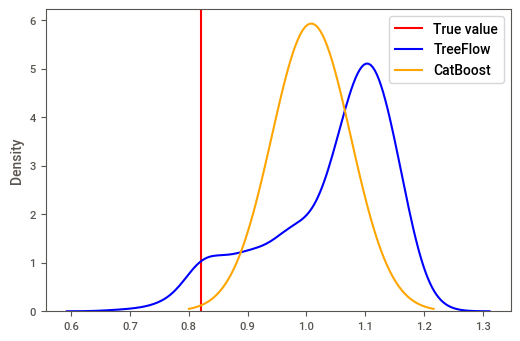

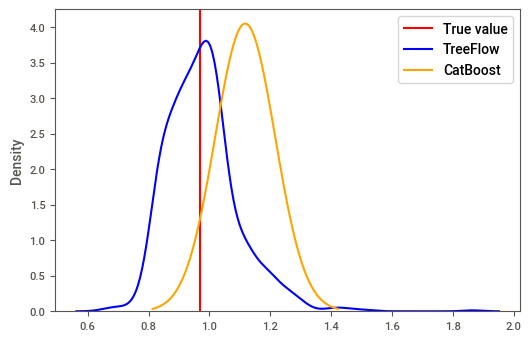

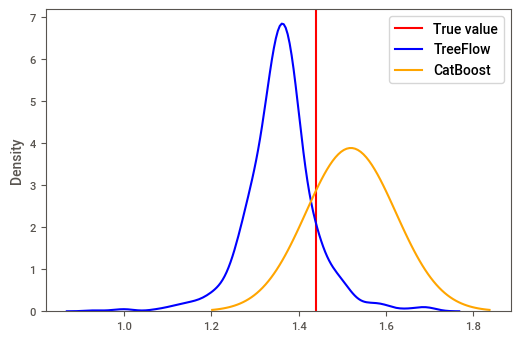

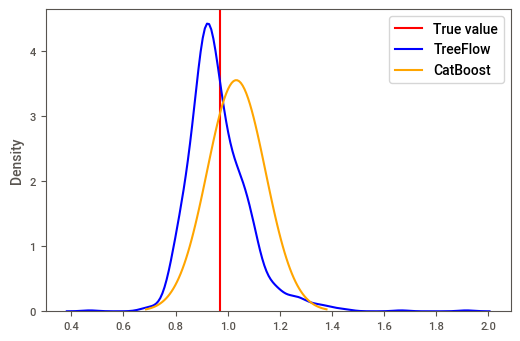

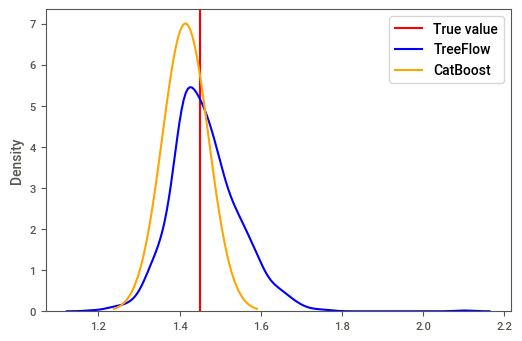

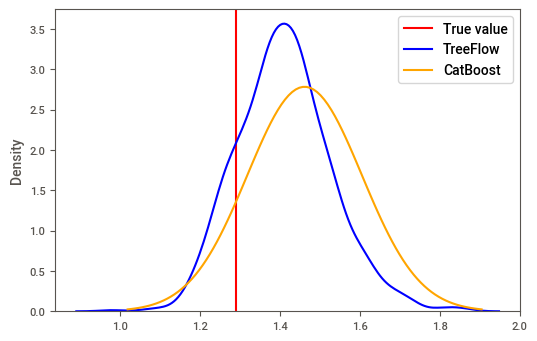

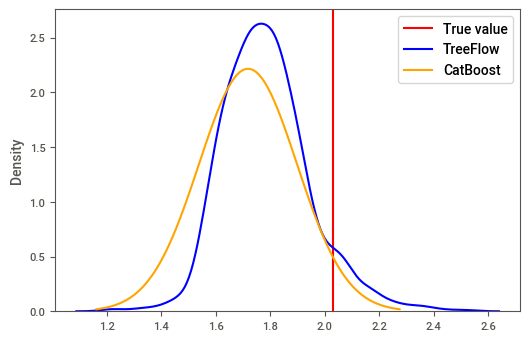

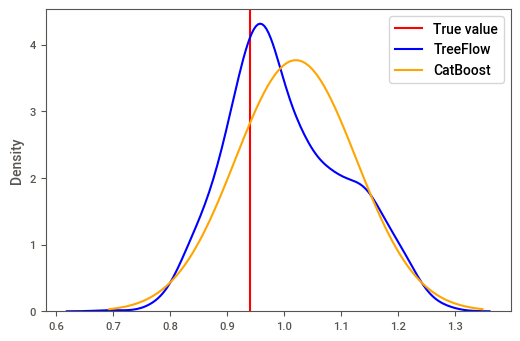

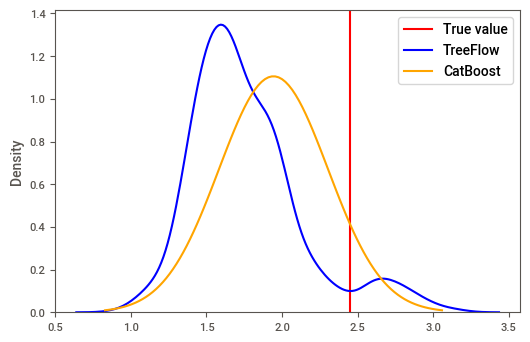

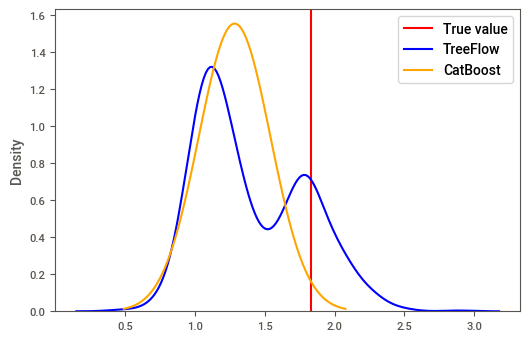

In [18]:
for i in range(10):
    plt.axvline(x=y_test.values[i, :], color='r', label='True value')

    sns.kdeplot(y_test_samples[i, :], color='blue', label='TreeFlow')

    x = np.linspace(
        stats.norm.ppf(0.001, loc=y_test_catboost[i, 0], scale=np.sqrt(y_test_catboost[i, 1])), 
        stats.norm.ppf(0.999, loc=y_test_catboost[i, 0], scale=np.sqrt(y_test_catboost[i, 1])), 
        100
    )
    plt.plot(x, stats.norm.pdf(x, loc=y_test_catboost[i, 0], scale=np.sqrt(y_test_catboost[i, 1])), color = 'orange', label='CatBoost')

    plt.legend()
    plt.show()